In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uberdrives/My Uber Drives - 2016.csv


In [172]:
df = pd.read_csv("/kaggle/input/uberdrives/My Uber Drives - 2016.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [82]:
df.shape

(1156, 7)

In [83]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [84]:
df['CATEGORY*'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [85]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [86]:
df['START*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [87]:
df['START*'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START*, Length: 177, dtype: int64

In [88]:
df['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [89]:
df['STOP*'].value_counts()

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP*, Length: 188, dtype: int64

In [90]:
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

# Splitting into Date and Time

In [173]:
df[['Start_Date', 'Start_Time']] = df['START_DATE*'].str.split(n=1, expand=True)
df['Start_Time'] = df['Start_Time'].str.split().str[-1]

In [92]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Date,Start_Time
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42


In [174]:
df[['End_Date', 'End_Time']] = df['END_DATE*'].str.split(n=1, expand=True)
df['End_Time'] = df['End_Time'].str.split().str[-1]

In [175]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Date,Start_Time,End_Date,End_Time
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49


In [95]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
Start_Date       0
Start_Time       1
End_Date         1
End_Time         1
dtype: int64

In [96]:
df = df.drop(columns=['START_DATE*', 'END_DATE*'])

In [176]:
df = df.rename(columns={'CATEGORY*': 'Trip_Category', 'START*': 'Start_Location', 'STOP*': 'Stop_Location', 'PURPOSE*': 'Purpose'})

In [147]:
df.head()

,Trip_Category,Start_Location,Stop_Location,MILES*,Purpose,Start_Date,Start_Time,End_Date,End_Time,Month,MonthName
0,Business,others,others,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17,1,None
1,Business,others,others,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37,1,None
2,Business,others,others,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38,1,None
3,Business,others,others,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45,1,None
4,Business,others,others,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49,1,None


# Plot Trip Category

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

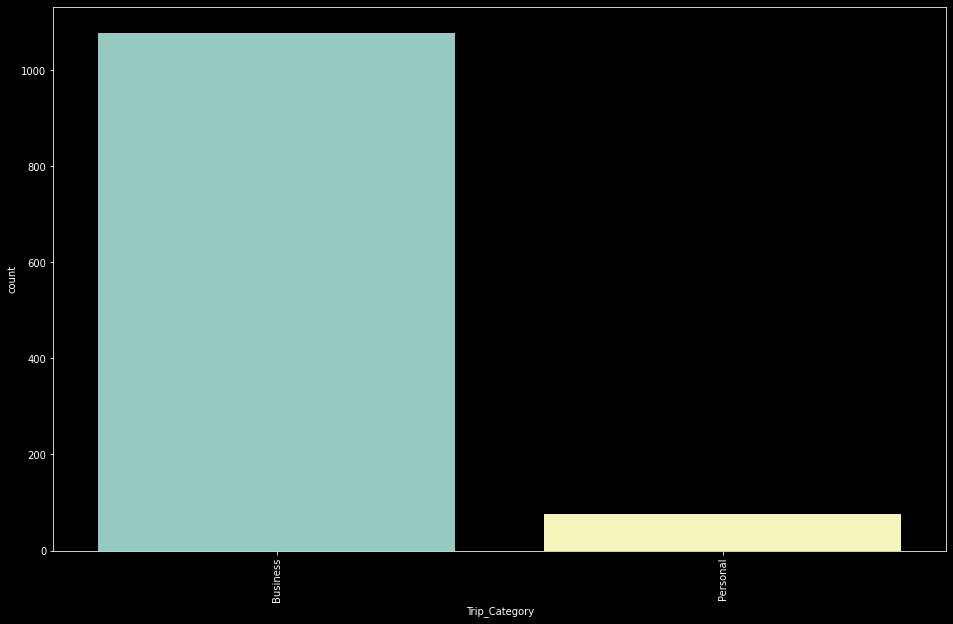

In [148]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['Trip_Category'])
plt.xticks(rotation=90)

# Plot Starting Location

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'Cary'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Durham'),
  Text(4, 0, 'Whitebridge'),
  Text(5, 0, 'Unknown Location'),
  Text(6, 0, 'Islamabad'),
  Text(7, 0, 'Lahore')])

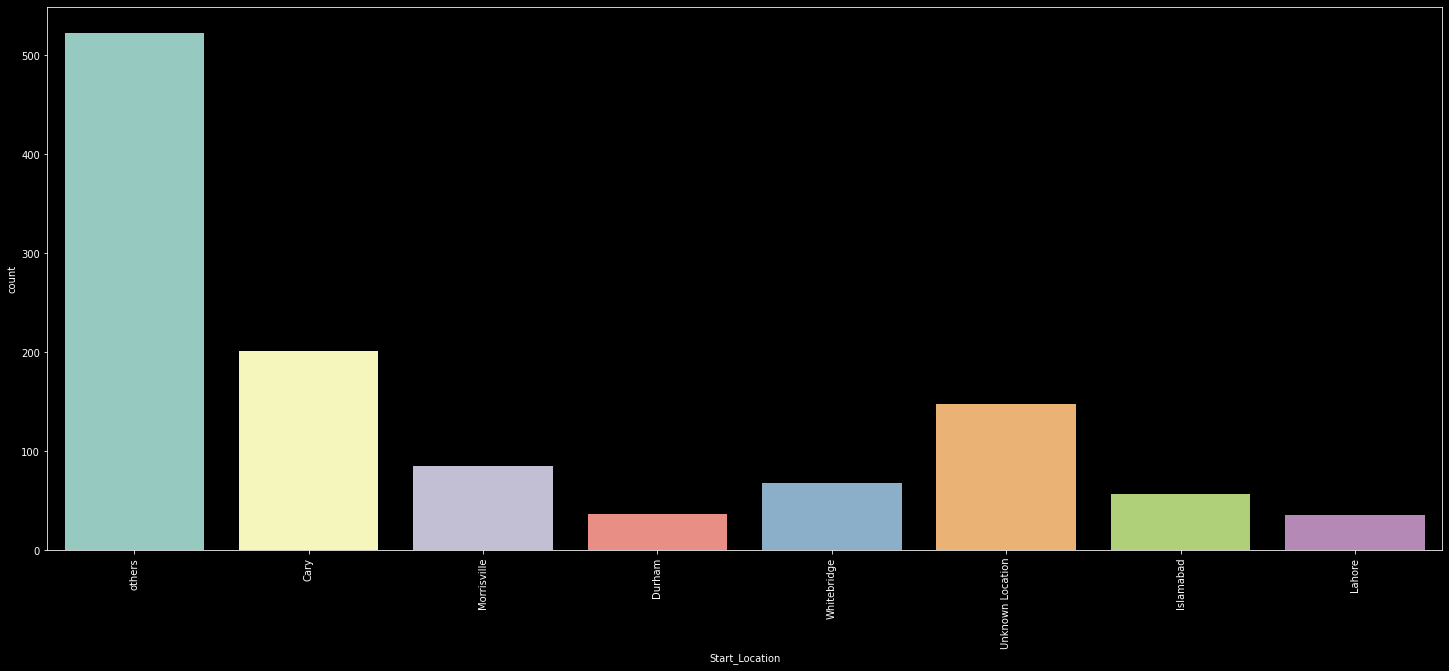

In [156]:
plt.figure(figsize = (25,10))
ax = sns.countplot(df['Start_Location'])
plt.xticks(rotation=90)

# Func: Handle Location

In [152]:
Slocation = df['Start_Location'].value_counts(ascending = False)

Slocation_less30 = Slocation[Slocation<30] 

def handle_SLocation(value):
    if(value in Slocation_less30):
        return 'others'
    
    else:
        return value
    
df['Start_Location'] = df['Start_Location'].apply(handle_SLocation)
df['Start_Location'].value_counts()

others              523
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Name: Start_Location, dtype: int64

In [153]:
df6 = df['Start_Location']
df6.head()

0    others
1    others
2    others
3    others
4    others
Name: Start_Location, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'Cary'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Durham'),
  Text(4, 0, 'Whitebridge'),
  Text(5, 0, 'Unknown Location'),
  Text(6, 0, 'Islamabad'),
  Text(7, 0, 'Lahore')])

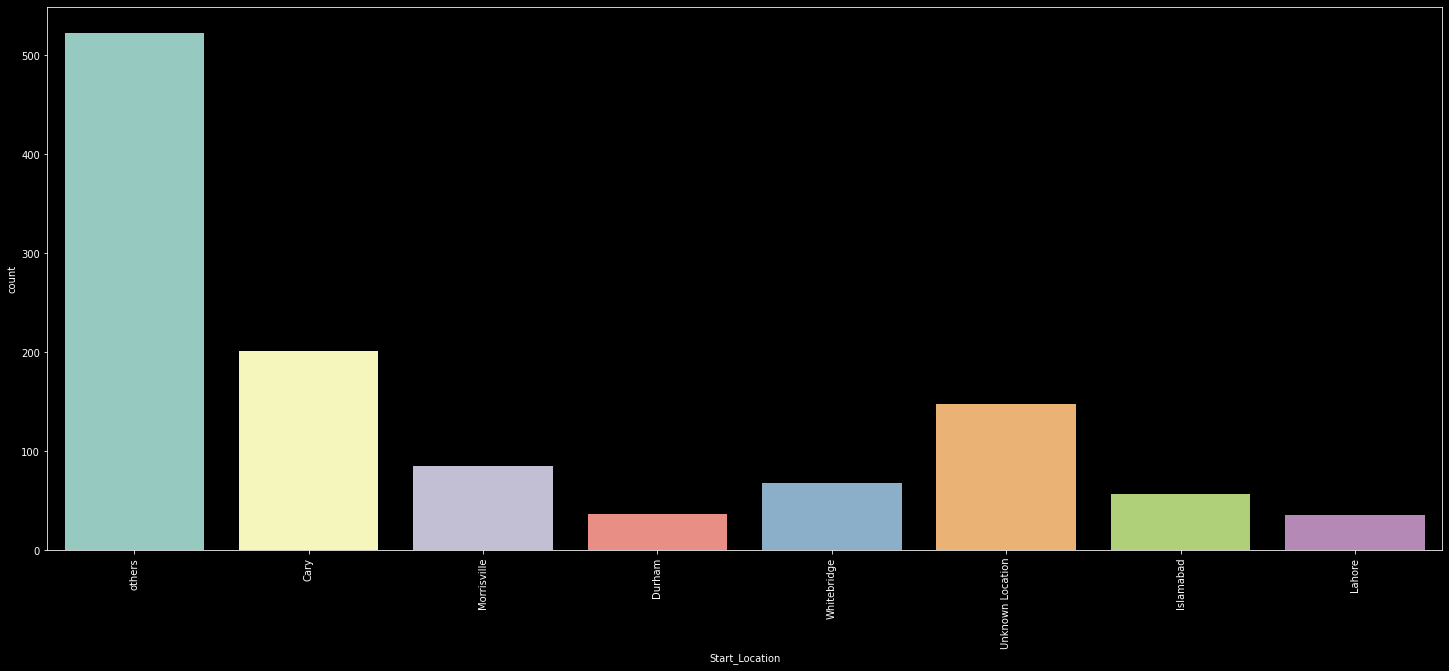

In [154]:
plt.figure(figsize = (25,10))
ax = sns.countplot(df['Start_Location'])
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

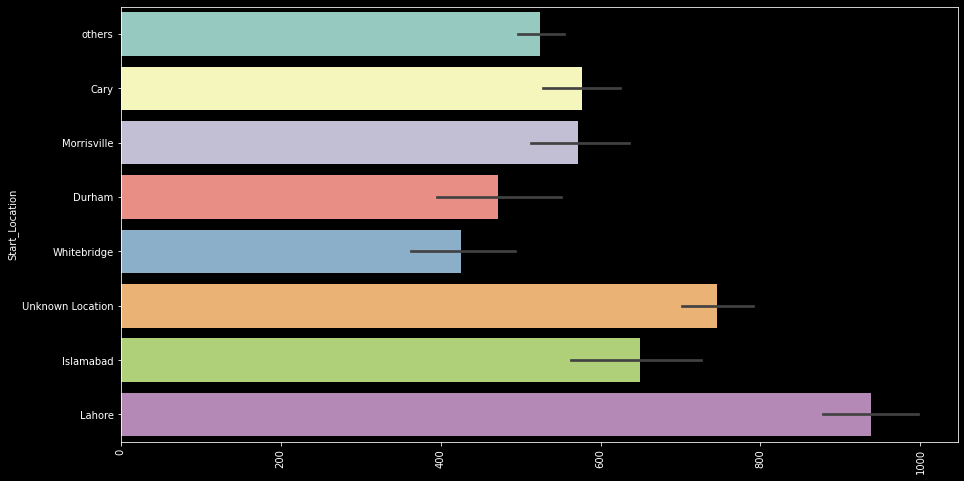

In [157]:
plt.figure(figsize = (15, 8))
sns.barplot(df6.index, df6)
plt.xticks(rotation = 90)

# Func: Handle End Location

In [158]:
Elocation = df['Stop_Location'].value_counts(ascending = False)

Elocation_less30 = Elocation[Elocation<30] 

def handle_ELocation(value):
    if(value in Elocation_less30):
        return 'others'
    
    else:
        return value
    
df['Stop_Location'] = df['Stop_Location'].apply(handle_ELocation)
df['Stop_Location'].value_counts()

others              524
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Name: Stop_Location, dtype: int64

In [159]:
df7 = df['Stop_Location']
df7.head()

0    others
1    others
2    others
3    others
4    others
Name: Stop_Location, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

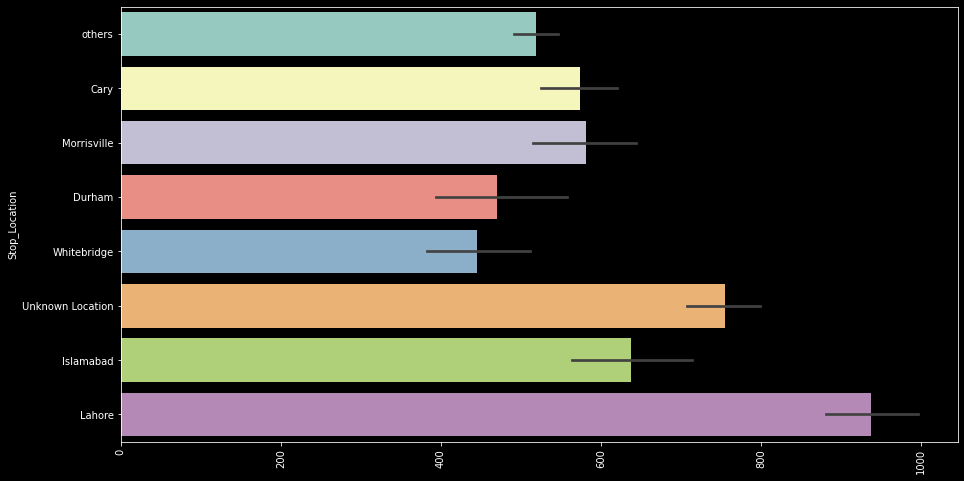

In [160]:
plt.figure(figsize = (15, 8))
sns.barplot(df7.index, df7)
plt.xticks(rotation = 90)

In [163]:
df['Purpose'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
others              27
Name: Purpose, dtype: int64

# Func: Handle Purpose

In [164]:
SPurpose = df['Purpose'].value_counts(ascending = False)

SPurpose_less30 = SPurpose[SPurpose<30] 

def handle_SPurpose(value):
    if(value in SPurpose_less30):
        return 'others'
    
    else:
        return value
    
df['Purpose'] = df['Purpose'].apply(handle_SPurpose)
df['Purpose'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
others              27
Name: Purpose, dtype: int64

# Plot: Purpose

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


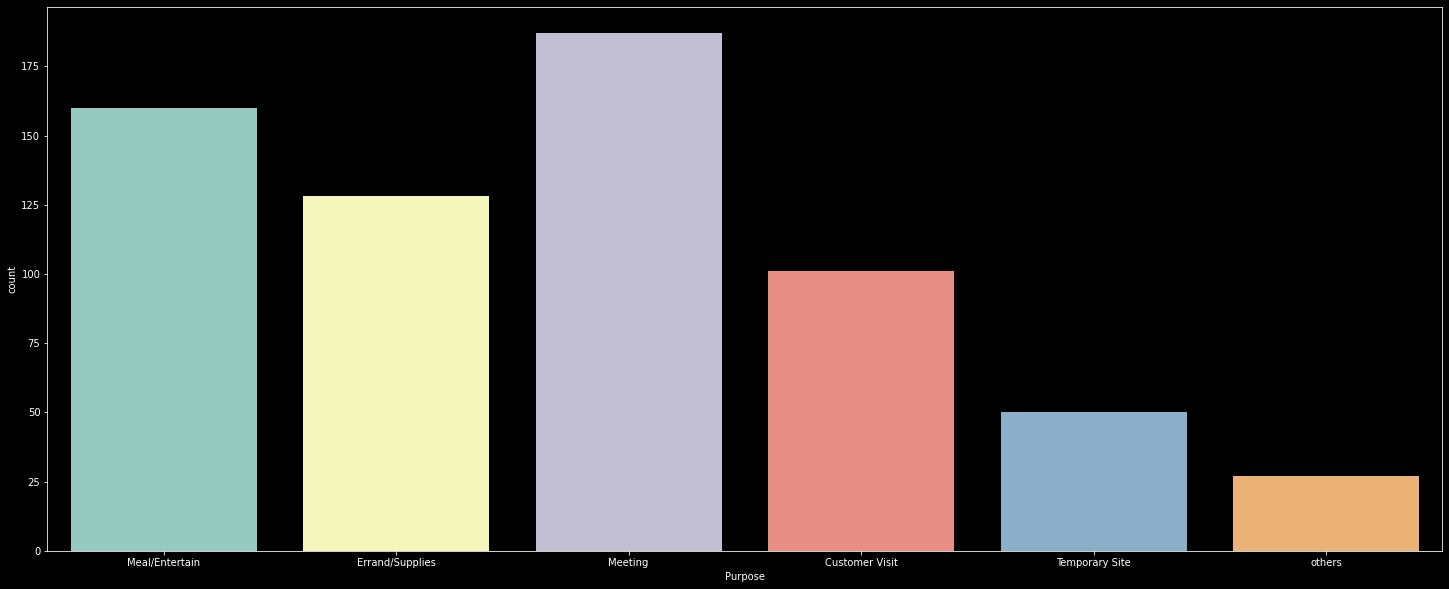

In [165]:
plt.figure(figsize = (25,10))
ax = sns.countplot(df['Purpose'])

In [171]:
df

,Trip_Category,Start_Location,Stop_Location,MILES*,Purpose,Start_Date,Start_Time,End_Date,End_Time,Month,MonthName
0,Business,others,others,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17,1,None
1,Business,others,others,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37,1,None
2,Business,others,others,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38,1,None
3,Business,others,others,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45,1,None
4,Business,others,others,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49,1,None
...,...,...,...,...,...,...,...,...,...,...,...
1150,Business,others,others,0.7,Meeting,12/31/2016,1:07,12/31/2016,1:14,12,None
1151,Business,others,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42,12,None
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38,12,None
1153,Business,others,others,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50,12,None


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Trip_Category   1155 non-null   object 
 1   Start_Location  1155 non-null   object 
 2   Stop_Location   1155 non-null   object 
 3   MILES*          1155 non-null   float64
 4   Purpose         653 non-null    object 
 5   Start_Date      1155 non-null   object 
 6   Start_Time      1155 non-null   object 
 7   End_Date        1155 non-null   object 
 8   End_Time        1155 non-null   object 
 9   Month           1155 non-null   int64  
 10  MonthName       0 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 99.4+ KB


In [177]:
 df['Month'] = df['Start_Date'].str.split('/').str[0]

In [169]:
# df['Month'] = df['Start_Date'].apply(lambda x: x.split('/', 2)[0])

# Extraction of Month

In [179]:
df.tail()

,START_DATE*,END_DATE*,Trip_Category,Start_Location,Stop_Location,MILES*,Purpose,Start_Date,Start_Time,End_Date,End_Time,Month
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42,12
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38,12
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50,12
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,12/31/2016,22:08,12/31/2016,23:51,12
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN,Totals,None,NaN,NaN,Totals


In [180]:
df.head()

,START_DATE*,END_DATE*,Trip_Category,Start_Location,Stop_Location,MILES*,Purpose,Start_Date,Start_Time,End_Date,End_Time,Month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17,1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37,1
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38,1
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49,1


In [181]:
df['Month'].value_counts()

12        146
8         133
11        122
2         115
3         113
7         112
6         108
10        106
1          61
4          54
5          49
9          36
Totals      1
Name: Month, dtype: int64

In [183]:
df = df.iloc[:1155]
df

,START_DATE*,END_DATE*,Trip_Category,Start_Location,Stop_Location,MILES*,Purpose,Start_Date,Start_Time,End_Date,End_Time,Month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17,1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37,1
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38,1
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,12/31/2016,1:07,12/31/2016,1:14,12
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42,12
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38,12
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50,12


# Plot: Count v/s Month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


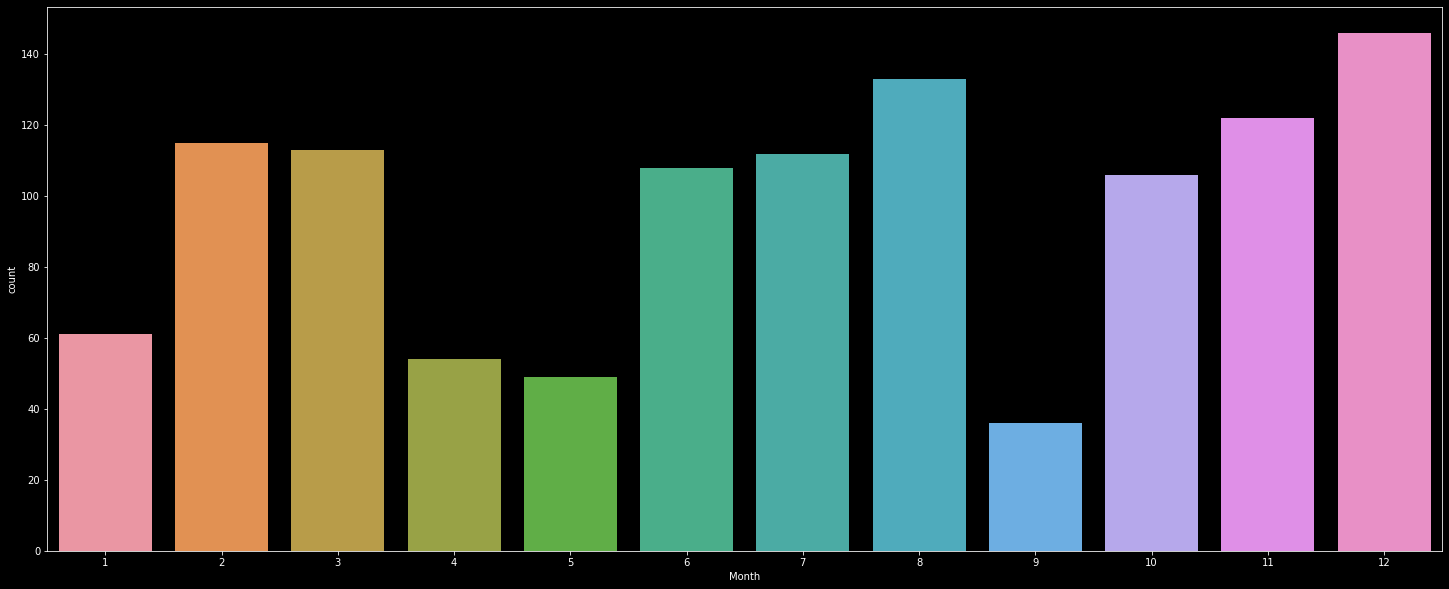

In [184]:
plt.figure(figsize = (25,10))
ax = sns.countplot(df['Month'])

In [186]:
df

,START_DATE*,END_DATE*,Trip_Category,Start_Location,Stop_Location,MILES*,Purpose,Start_Date,Start_Time,End_Date,End_Time,Month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17,1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37,1
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38,1
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,12/31/2016,1:07,12/31/2016,1:14,12
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,13:24,12/31/2016,13:42,12
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,15:03,12/31/2016,15:38,12
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,21:32,12/31/2016,21:50,12


# Summary

* Most Start and Stop location are from Lahore
* This User trips are mainly for Business Reasons
* The Major purpose for these trips are for Meetings
* Most of the trips are done in the month of December
* The month having least trips are September